## 1.파일 다운로드

In [ ]:
!git clone https://github.com/Soyoung-Yoon/data_01

## 2.Colab에서 한글 폰트 사용하기

In [ ]:
###########폰트 라이브러리 불러오기#############
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl

!sudo apt-get install -qq -y fonts-nanum

%config InlineBackend.figure_format = 'retina'
sys_font=fm.findSystemFonts()
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)
mpl.font_manager._rebuild()
print('설치가 되었습니다.')

In [ ]:
# 위의 코드 실행 후 colab 메뉴에서 '런타임' -> '런타임 다시 시작' 실행

In [ ]:
####### 런타임 다시 시작 후 실행 #######
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

plt.rcParams['font.family']='NanumGothic'  #폰트 설정
fm._rebuild()

## 3.미세먼지

In [1]:
# [3-0] 사용라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

### 3-1.파일 준비하기
- data_day_2016.xlsx, data_day_2017.xlsx, data_day_2018.xlsx, data_day_2019.xlsx 파일을 가져와 df로 합치기작업
- 각 파일에 기록되어 있는 내용
    - 측정일시, 측정소명, 이산화질소농도, 오존농도, 이산화탄소농도, 아황산가스, 미세먼지, 초미세먼지의 측정치

In [3]:
import glob
dataList = []

for x in sorted(glob.glob('./data_01/data_day_*.xlsx')):
    temp = pd.read_excel(x, engine='openpyxl')
    dataList.append(temp)

df = pd.concat(dataList, axis=0)
df.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),일산화탄소농도(ppm)
0,20160101,강남구,0.047,0.006,0.8,0.006,73.0,44.0,NaN
1,20160101,강남대로,0.054,0.004,1.2,0.009,85.0,52.0,NaN
2,20160101,강동구,0.043,0.002,0.9,0.004,77.0,45.0,NaN
3,20160101,강변북로,0.046,0.004,1.1,0.006,73.0,39.0,NaN
4,20160101,강북구,0.047,0.004,1.1,0.004,77.0,52.0,NaN


In [4]:
df.shape

(60208, 9)

In [5]:
df.tail()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),일산화탄소농도(ppm)
19252,20190818,청계천로,0.019,0.055,NaN,0.005,24.0,16.0,0.5
19253,20190818,한강대로,0.030,0.031,NaN,0.004,26.0,15.0,0.5
19254,20190818,행주,0.014,0.060,NaN,0.004,25.0,13.0,0.5
19255,20190818,홍릉로,0.027,0.047,NaN,0.004,30.0,20.0,0.7
19256,20190818,화랑로,0.022,0.040,NaN,0.003,13.0,13.0,0.3


In [6]:
# [3-1] './data_01/data_day_2016.xlsx' 파일을 가져와 df2016이라는 이름을 부여합니다.
df2016 = pd.read_excel('./data_01/data_day_2016.xlsx', engine='openpyxl')
df2016.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20160101,강남구,0.047,0.006,0.8,0.006,73.0,44.0
1,20160101,강남대로,0.054,0.004,1.2,0.009,85.0,52.0
2,20160101,강동구,0.043,0.002,0.9,0.004,77.0,45.0
3,20160101,강변북로,0.046,0.004,1.1,0.006,73.0,39.0
4,20160101,강북구,0.047,0.004,1.1,0.004,77.0,52.0


In [7]:
# [3-2] './data_01/data_day_2017.xlsx' 파일을 가져와 df2017이라는 이름을 부여합니다.
df2017 = pd.read_excel('./data_01/data_day_2017.xlsx', engine='openpyxl')
df2017.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20170101,강남구,0.040,0.002,0.8,0.005,80.0,58.0
1,20170101,강남대로,0.082,0.005,1.4,0.007,83.0,58.0
2,20170101,강동구,0.039,0.003,0.8,0.004,80.0,54.0
3,20170101,강변북로,0.042,0.003,0.8,0.004,81.0,NaN
4,20170101,강북구,0.046,0.003,1.0,0.005,78.0,65.0


In [8]:
# [3-3] './data_01/data_day_2018.xlsx' 파일을 가져와 df2018이라는 이름을 부여합니다.
df2018 = pd.read_excel('./data_01/data_day_2018.xlsx', engine='openpyxl')
df2018.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20180101,강남구,0.033,0.010,0.6,0.006,34.0,22.0
1,20180101,강남대로,0.040,0.007,0.8,0.006,NaN,17.0
2,20180101,강동구,0.038,0.010,0.7,0.005,48.0,24.0
3,20180101,강변북로,0.033,0.008,0.6,0.005,48.0,15.0
4,20180101,강북구,0.026,0.018,0.6,0.004,38.0,18.0


In [9]:
# [3-4] './data_01/data_day_2019.xlsx' 파일을 가져와 df2019라는 이름을 부여합니다.
df2019 = pd.read_excel('./data_01/data_day_2019.xlsx', engine='openpyxl')
df2019.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20200818,강남구,0.022,0.006,0.4,0.003,28.0,21.0
1,20200818,강남대로,0.017,0.005,0.6,0.003,25.0,11.0
2,20200818,강동구,NaN,0.004,0.3,0.003,33.0,22.0
3,20200818,강변북로,0.025,0.003,0.8,0.003,26.0,17.0
4,20200818,강북구,0.008,0.008,0.3,0.002,32.0,18.0


In [10]:
temp1 = pd.DataFrame({'A': [1, 2],
                     'B': [3, 4]})
temp2 = pd.DataFrame({'A': [5, 6],
                     'B': [7, 8]})
pd.concat([temp1, temp2])

,A,B
0,1,3
1,2,4
0,5,7
1,6,8


In [11]:
temp1 = pd.DataFrame({'A': [1, 2],
                     'B': [3, 4]})
temp2 = pd.DataFrame({'C': [5, 6],
                     'D': [7, 8]})
pd.concat([temp1, temp2], axis=1)

,A,B,C,D
0,1,3,5,7
1,2,4,6,8


In [12]:
# [3-5] df2016, df2017, df2018, df2019를 합쳐 한 개의 DataFrame으로 만들어 df라는 이름을 지정합니다.
dfList = [df2016, df2017, df2018, df2019]
df = pd.concat(dfList, axis=0, ignore_index=True)

# df의 shape을 출력하여 전체 행, 열의 수를 확인합니다.
df.shape

(60208, 9)

In [13]:
df.tail()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),일산화탄소농도(ppm)
60203,20190818,청계천로,0.019,0.055,NaN,0.005,24.0,16.0,0.5
60204,20190818,한강대로,0.030,0.031,NaN,0.004,26.0,15.0,0.5
60205,20190818,행주,0.014,0.060,NaN,0.004,25.0,13.0,0.5
60206,20190818,홍릉로,0.027,0.047,NaN,0.004,30.0,20.0,0.7
60207,20190818,화랑로,0.022,0.040,NaN,0.003,13.0,13.0,0.3


여기서 잠깐! 파일이 많으면요? 
- 파일이름 목록을 가져오는 glob 모듈의 glob 함수를 사용함
- 시험 대비용은 아님

In [14]:
import glob
glob.glob('data_01/data_day_*.xlsx')

['data_01/data_day_2016.xlsx',
 'data_01/data_day_2017.xlsx',
 'data_01/data_day_2018.xlsx',
 'data_01/data_day_2019.xlsx']

In [15]:
#[TIP] 만일 파일이름을 정렬하고 싶다면 sorted() 함수를 사용합니다. 
# (-.- 강의에서는 언급을 몬했어요 ㅎ)
sorted(glob.glob('data_01/data_day_*.xlsx'))

['data_01/data_day_2016.xlsx',
 'data_01/data_day_2017.xlsx',
 'data_01/data_day_2018.xlsx',
 'data_01/data_day_2019.xlsx']

In [16]:
import glob
dfList = []
for x in sorted(glob.glob('data_01/data_day_*.xlsx')):
    temp = pd.read_excel(x)
    dfList.append(temp)

df = pd.concat(dfList, axis=0)   
df.shape

(60208, 9)

In [17]:
# [3-6] df의 row의 개수 및 각 column의 정보 및 메모리 사용량을 확인합니다.
# 몇몇 컬럼에 대한 정보가 부족한 것을 확인할 수 있습니다.
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60208 entries, 0 to 19256
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          60208 non-null  int64  
 1   측정소명          60208 non-null  object 
 2   이산화질소농도(ppm)  58050 non-null  float64
 3   오존농도(ppm)     58075 non-null  float64
 4   이산화탄소농도(ppm)  40421 non-null  float64
 5   아황산가스(ppm)    58075 non-null  float64
 6   미세먼지(㎍/㎥)     59327 non-null  float64
 7   초미세먼지(㎍/㎥)    58429 non-null  float64
 8   일산화탄소농도(ppm)  17591 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.2 MB


In [18]:
# [3-7] df의 마지막 3개 행을 출력해 봅니다.
# 데이터가 총 60208인데 마지막 행의 번호가 올바르지 않은 것을 볼 수 있습니다.
# 이것은 concat을 하더라도 index는 유지 되기 때문입니다.
df.tail(3)

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),일산화탄소농도(ppm)
19254,20190818,행주,0.014,0.060,NaN,0.004,25.0,13.0,0.5
19255,20190818,홍릉로,0.027,0.047,NaN,0.004,30.0,20.0,0.7
19256,20190818,화랑로,0.022,0.040,NaN,0.003,13.0,13.0,0.3


In [19]:
# [3-8] df2016, df2017, df2018, df2019의 각 shape을 확인합니다.
for temp in [df2016, df2017, df2018, df2019]:
    print(temp.shape)

(14269, 8)
(14235, 8)
(12447, 8)
(19257, 8)


In [20]:
[ x.shape for x in dfList ] 

[(14269, 8), (14235, 8), (12447, 8), (19257, 8)]

In [21]:
[ x.shape for x in dfList]

[(14269, 8), (14235, 8), (12447, 8), (19257, 8)]

index, columns => 두 가지 방법 사용
1. 눈에 보이지 않는 integer 번호 (python에서의 index번호 개념) => 사용하고 싶음
2. 눈에 보이는 label (다양한 Index타입이 존재)

In [22]:
# [3-9] 첫 번째 파일 마지막부터 두 번째 파일의 시작 부분의 실제 index를 확인해 봅니다.
# 14268:14271 의 실제 index 확인
df.iloc[14268:14271, :]

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),일산화탄소농도(ppm)
14268,20161231,화랑로,0.122,0.004,1.1,0.005,64.0,NaN,NaN
0,20170101,강남구,0.040,0.002,0.8,0.005,80.0,58.0,NaN
1,20170101,강남대로,0.082,0.005,1.4,0.007,83.0,58.0,NaN


여러개 DataFrame을 합친 경우 index 번호를 RangeIndex로 새롭게 부여
- pd.concat([df1, df2...], ignore_index=True)
- DataFrame.index = pd.RangeIndex(len(df))

In [23]:
# [3-10] 해결방법 1 : index 번호 정리하면서 합치기
dfList = [df2016, df2017, df2018, df2019]
df2 = pd.concat(dfList, ignore_index=True)
df.tail()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),일산화탄소농도(ppm)
19252,20190818,청계천로,0.019,0.055,NaN,0.005,24.0,16.0,0.5
19253,20190818,한강대로,0.030,0.031,NaN,0.004,26.0,15.0,0.5
19254,20190818,행주,0.014,0.060,NaN,0.004,25.0,13.0,0.5
19255,20190818,홍릉로,0.027,0.047,NaN,0.004,30.0,20.0,0.7
19256,20190818,화랑로,0.022,0.040,NaN,0.003,13.0,13.0,0.3


In [24]:
# [3-11] 해결방법 2 : index를 만들어 사용하기
df.index = pd.RangeIndex(len(df))
df.tail()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),일산화탄소농도(ppm)
60203,20190818,청계천로,0.019,0.055,NaN,0.005,24.0,16.0,0.5
60204,20190818,한강대로,0.030,0.031,NaN,0.004,26.0,15.0,0.5
60205,20190818,행주,0.014,0.060,NaN,0.004,25.0,13.0,0.5
60206,20190818,홍릉로,0.027,0.047,NaN,0.004,30.0,20.0,0.7
60207,20190818,화랑로,0.022,0.040,NaN,0.003,13.0,13.0,0.3


### 3-2.날짜 타입변경

In [25]:
# [3-12] df의 컬럼별 데이터 타입을 확인합니다.
df.dtypes

측정일시              int64
측정소명             object
이산화질소농도(ppm)    float64
오존농도(ppm)       float64
이산화탄소농도(ppm)    float64
아황산가스(ppm)      float64
미세먼지(㎍/㎥)       float64
초미세먼지(㎍/㎥)      float64
일산화탄소농도(ppm)    float64
dtype: object

In [26]:
# [3-13] df의 '측정일시'에 대해서 astype을 사용해 데이터 타입을 datetime으로 변경합니다.
# 올바르게 변경되지 않는 것을 확인할 수 있습니다.
df['측정일시'].astype('datetime64[ns]')

0       1970-01-01 00:00:00.020160101
1       1970-01-01 00:00:00.020160101
2       1970-01-01 00:00:00.020160101
3       1970-01-01 00:00:00.020160101
4       1970-01-01 00:00:00.020160101
                     ...             
60203   1970-01-01 00:00:00.020190818
60204   1970-01-01 00:00:00.020190818
60205   1970-01-01 00:00:00.020190818
60206   1970-01-01 00:00:00.020190818
60207   1970-01-01 00:00:00.020190818
Name: 측정일시, Length: 60208, dtype: datetime64[ns]

날짜, 시간 타입 변경 (youtube 분석에서 했었어요!)
- pd.to_datetime(Series, format='형식')
    - %Y: 4글자 년도, %y : 2글자 년도, %m : 2글자 월, %d : 2글자 일
    - 다양한 형식 문자들 : https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    - format의 지정이 필수는 아님

In [27]:
# [3-14] df의 '측정일시'에 대해서 format='%Y%m%d'을 지정하여 데이터 타입을 datetime으로 변경합니다.
# 올바르게 변경되는 것을 확인할 수 있습니다.
pd.to_datetime(df['측정일시'], format='%Y%m%d')

0       2016-01-01
1       2016-01-01
2       2016-01-01
3       2016-01-01
4       2016-01-01
           ...    
60203   2019-08-18
60204   2019-08-18
60205   2019-08-18
60206   2019-08-18
60207   2019-08-18
Name: 측정일시, Length: 60208, dtype: datetime64[ns]

DataFrame.insert(위치, 이름, 데이터)
- return이 없는 함수 (inplace 동작)
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.insert.html

In [28]:
# [3-15] df의 '측정일시'에 대해서 format='%Y%m%d'을 지정하여 데이터 타입을 datetime으로 변경한 뒤 
# '측정일시2' 컬럼을 '측정일시' 뒤에 삽입합니다
#df['측정일시2'] = pd.to_datetime(df['측정일시'], format='%Y%m%d')   # 뒤에 추가
# df['측정일시2'] = pd.to_datetime(df['측정일시'], format='%Y%m%d')
df.insert(1, '측정일시2', pd.to_datetime(df['측정일시'], format='%Y%m%d'))

In [29]:
# [3-16] df에 datetime64 데이터타입을 갖는 '측정일시2' 컬럼이 추가된 것을 확인합니다.
df.dtypes

측정일시                     int64
측정일시2           datetime64[ns]
측정소명                    object
이산화질소농도(ppm)           float64
오존농도(ppm)              float64
이산화탄소농도(ppm)           float64
아황산가스(ppm)             float64
미세먼지(㎍/㎥)              float64
초미세먼지(㎍/㎥)             float64
일산화탄소농도(ppm)           float64
dtype: object

In [30]:
# [3-17] datetime 타입은 accessor - dt를 사용할 수 있습니다.
# https://pandas.pydata.org/pandas-docs/stable/reference/series.html#accessors
# df의 '측정일시2' 컬럼의 dt accessor를 사용하여 year 정보만 확인합니다.
df['측정일시2'].dt.year

0        2016
1        2016
2        2016
3        2016
4        2016
         ... 
60203    2019
60204    2019
60205    2019
60206    2019
60207    2019
Name: 측정일시2, Length: 60208, dtype: int64

In [31]:
# [3-18] df의 '측정일시2' 컬럼의 dt를 사용하여 month 정보만 확인합니다.
df['측정일시2'].dt.month

0        1
1        1
2        1
3        1
4        1
        ..
60203    8
60204    8
60205    8
60206    8
60207    8
Name: 측정일시2, Length: 60208, dtype: int64

In [32]:
# [3-19] df의 '측정일시2' 컬럼의 dt를 사용하여 day 정보만 확인합니다.
df['측정일시2'].dt.day

0         1
1         1
2         1
3         1
4         1
         ..
60203    18
60204    18
60205    18
60206    18
60207    18
Name: 측정일시2, Length: 60208, dtype: int64

In [33]:
# [3-20] df에 '년', '월', '일' 컬럼을 추가합니다.
df['년'] = df['측정일시2'].dt.year
df['월'] = df['측정일시2'].dt.month
df['일'] = df['측정일시2'].dt.day

df.head(2)

,측정일시,측정일시2,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),일산화탄소농도(ppm),년,월,일
0,20160101,2016-01-01,강남구,0.047,0.006,0.8,0.006,73.0,44.0,NaN,2016,1,1
1,20160101,2016-01-01,강남대로,0.054,0.004,1.2,0.009,85.0,52.0,NaN,2016,1,1


DataFrame.drop([컬럼이름1, 컬럼이름2,...], axis=1)
- 컬럼 삭제
- 목록에 있는 컬럼이 삭제된 DataFrame을 반환

DataFrame.drop([행이름1, 행이름2, ...], axis=0)
- 행 삭제
- 목록에 있는 행이 삭제된 DataFrame을 반환

삭제할 컬럼 또는 행이 1개인 경우 목록이 아닌 한 개 이름만 지정할 수 있음

In [34]:
# [3-21] '측정일시2' 컬럼이 필요 없으므로 제거합니다.
# 컬럼을 제거하기 위해서는 drop 함수에서 axis=1 을 사용해야 합니다.
# 삭제된 DataFrame을 df2 이름을 지정합니다.
#df.drop('측정일시2', axis=1)
df2 = df.drop('측정일시2', axis=1)
df2.head(2)

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),일산화탄소농도(ppm),년,월,일
0,20160101,강남구,0.047,0.006,0.8,0.006,73.0,44.0,NaN,2016,1,1
1,20160101,강남대로,0.054,0.004,1.2,0.009,85.0,52.0,NaN,2016,1,1


In [35]:
df2.to_csv('fine_dust.csv', index=False)

In [36]:
df2 = pd.read_csv('fine_dust.csv')
df2.head(2)

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),일산화탄소농도(ppm),년,월,일
0,20160101,강남구,0.047,0.006,0.8,0.006,73.0,44.0,NaN,2016,1,1
1,20160101,강남대로,0.054,0.004,1.2,0.009,85.0,52.0,NaN,2016,1,1


### 3-3.결측치 확인 
- [pandas-02] drinks 에서 다루어 본 내용입니다.
- heatmap 그래프를 사용한 결측치 확인방법을 알아보겠습니다.
- 데이터가 많을 때 직관적인 판단을 할 수 있게 됩니다.


In [37]:
pd.describe_option()

compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
compute.use_numba : bool
    Use the numba engine option for select operations if it is installed,
    the default is False
    Valid values: False,True
    [default: False] [currently: False]
compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
display.chop_threshold : float or None
    if set to a float value, all float values smaller than the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.column_space No description available.
    [defa

In [38]:
# 데이타가 많은 경우 모두 출력 안되고 ... 으로 생략해서 출력됩니다.
# 생략되지 않는 행, 열의 개수를 설정하여 생략되지 않고 출력되도록 합니다.
# pd.set_option('max_rows', 800)    #출력할 max row를 지정
# pd.set_option('max_columns', 100)  #출력할 max columns를 지정
pd.set_option('display.max_rows', 800)    #출력할 max row를 지정
pd.set_option('display.max_columns', 100)  #출력할 max columns를 지정

In [39]:
# [3-22] df2를 복사하여 df를 생성합니다.
# 앞으로 결측치에 대한 처리는 df를 사용합니다.
df = df2.copy()

In [40]:
# [3-23] df의 행별 결측치를 조사합니다.
df.isna().sum(axis=0)

측정일시                0
측정소명                0
이산화질소농도(ppm)     2158
오존농도(ppm)        2133
이산화탄소농도(ppm)    19787
아황산가스(ppm)       2133
미세먼지(㎍/㎥)         881
초미세먼지(㎍/㎥)       1779
일산화탄소농도(ppm)    42617
년                   0
월                   0
일                   0
dtype: int64

In [41]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60208 entries, 0 to 60207
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          60208 non-null  int64  
 1   측정소명          60208 non-null  object 
 2   이산화질소농도(ppm)  58050 non-null  float64
 3   오존농도(ppm)     58075 non-null  float64
 4   이산화탄소농도(ppm)  40421 non-null  float64
 5   아황산가스(ppm)    58075 non-null  float64
 6   미세먼지(㎍/㎥)     59327 non-null  float64
 7   초미세먼지(㎍/㎥)    58429 non-null  float64
 8   일산화탄소농도(ppm)  17591 non-null  float64
 9   년             60208 non-null  int64  
 10  월             60208 non-null  int64  
 11  일             60208 non-null  int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 10.2 MB


In [42]:
# [3-24] '측정일시'를 index로 설정하고, 
# index 기준으로 오름차순 정렬해서 df1으로 이름 붙입니다.
# 그래프에서 y축으로 사용하려고 합니다.
df1 = df.set_index('측정일시').sort_index()
df1.head()

,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),일산화탄소농도(ppm),년,월,일
측정일시,,,,,,,,,,,
20160101,강남구,0.047,0.006,0.8,0.006,73.0,44.0,NaN,2016,1,1
20160101,성북구,0.056,0.005,1.3,0.007,71.0,45.0,NaN,2016,1,1
20160101,송파구,0.046,0.004,1.1,0.006,64.0,39.0,NaN,2016,1,1
20160101,신촌로,0.060,0.004,1.3,0.005,87.0,40.0,NaN,2016,1,1
20160101,양천구,0.049,0.008,1.1,0.005,82.0,65.0,NaN,2016,1,1


https://seaborn.pydata.org/generated/seaborn.heatmap.html
# vmax, vmin, cbar 

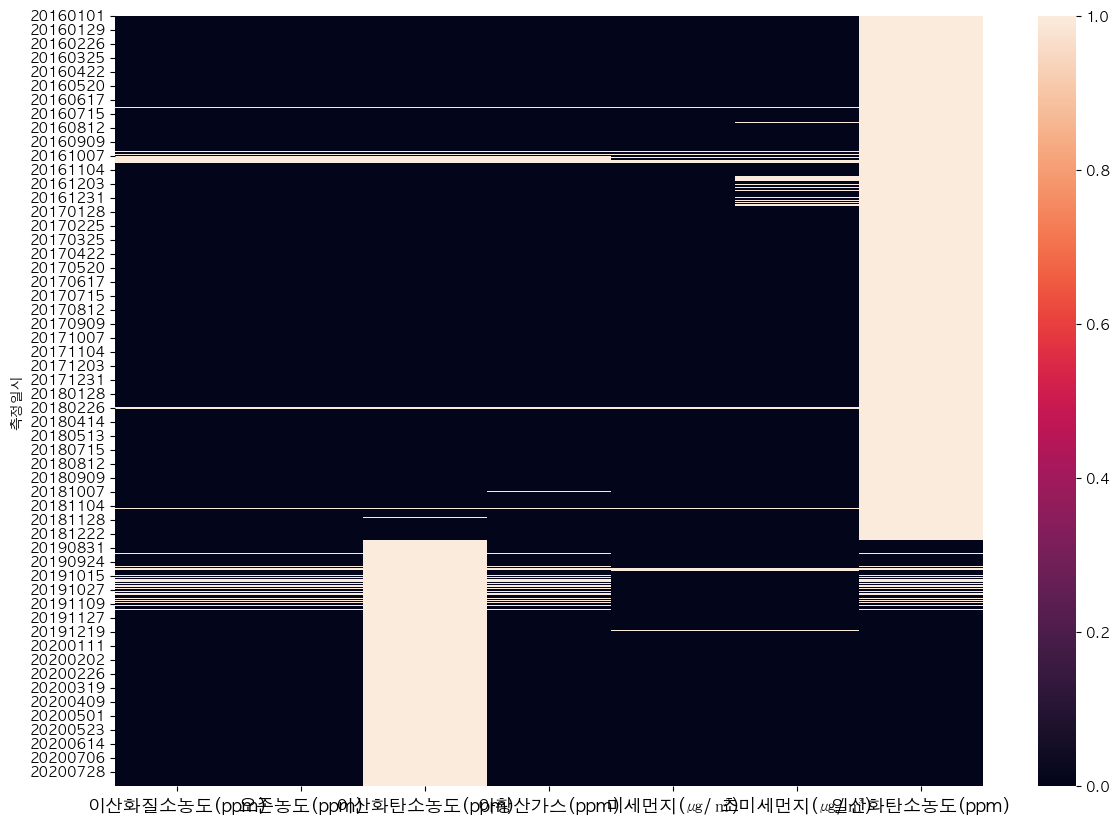

In [47]:
# [3-25] df1의 '이산화질소농도(ppm)':'일산화탄소농도(ppm)'의 결측치의 상태를 그래프로 확인해 봅니다
# seaborn.heatmap()를 사용하며, df.isna()를 데이터로 지정해 확인할 수 있습니다.
# 흐린색이 결측치를 의미합니다.
plt.figure(figsize=(14, 10))
ax = sns.heatmap(df1.loc[:, '이산화질소농도(ppm)':'일산화탄소농도(ppm)'].isna(), cbar=True)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=13, rotation=0)
plt.show()

데이터 중에서 오존농도, 미세먼지, 초미세먼지에 대해서만 사용할 것이므로, indexing한 뒤 다시 결측치 정보를 확인합니다.

- df['컬럼명'] : 1개의 컬럼을 Series로 반환
- df[['컬럼명1', '컬럼명2', ...]]  : 여러개의 컬럼을 DataFrame으로 반환
- df['행이름1':'행이름N'] : 행이름1 ~ 행이름 N 전까지를 반환
- df[조건] : 행 중에서 조건이 True인 행을 반환

In [48]:
# [3-26] df1에서 '측정소명', '년', '월', '일','오존농도(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)'컬럼만 
# 추출하여 df_dust 라는 이름을 정의합니다.
df_dust = df1[['측정소명', '년', '월', '일', '오존농도(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']]
df_dust.head()

,측정소명,년,월,일,오존농도(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
측정일시,,,,,,,
20160101,강남구,2016,1,1,0.006,73.0,44.0
20160101,성북구,2016,1,1,0.005,71.0,45.0
20160101,송파구,2016,1,1,0.004,64.0,39.0
20160101,신촌로,2016,1,1,0.004,87.0,40.0
20160101,양천구,2016,1,1,0.008,82.0,65.0


In [49]:
# [3-27] df_dust의 컬럼별 결측치 개수를 구해봅니다
df_dust.isnull().sum()

측정소명             0
년                0
월                0
일                0
오존농도(ppm)     2133
미세먼지(㎍/㎥)      881
초미세먼지(㎍/㎥)    1779
dtype: int64

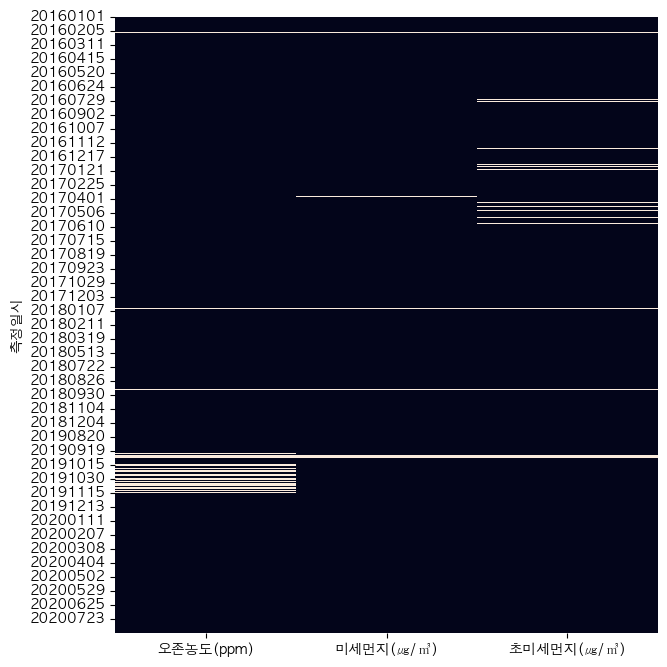

In [50]:
# [3-28] df_dust의 '오존농도(ppm)':'초미세먼지(㎍/㎥)'에 대한 결측치 heatmap을 그려봅니다.
plt.figure(figsize=(7, 8))
sns.heatmap(df_dust.loc[:, '오존농도(ppm)':'초미세먼지(㎍/㎥)'].isna(), cbar=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0,fontsize=12)
plt.show()

- DataFrame의 index를 columns로 사용 : DataFrame.reset_index()
- DataFrame의 columns를 index로 사용 : DataFrame.set_index('컬럼이름')


In [52]:
# [3-29] df_dust의 index를 다시 컬럼으로 사용되도록 합니다.
# 다음 작업인 결측치 삭제를 사용하기 위함
df_dust = df_dust.reset_index()
df_dust.head()

,index,측정일시,측정소명,년,월,일,오존농도(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,0,20160101,강남구,2016,1,1,0.006,73.0,44.0
1,1,20160101,성북구,2016,1,1,0.005,71.0,45.0
2,2,20160101,송파구,2016,1,1,0.004,64.0,39.0
3,3,20160101,신촌로,2016,1,1,0.004,87.0,40.0
4,4,20160101,양천구,2016,1,1,0.008,82.0,65.0


### 3-4.결측치 제거

DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
- 결측치 제거에 사용되는 메서드
- how='any' : 결측치가 하나라도 포함된 행 삭제
- how='all' : 모든 데이터가 결측치인 행 삭제
- axis=1 : 컬럼에 대해 동작
- thresh=숫자 : 숫자 이상의 데이터를 가진 행은 삭제 안함
- subset=[컬럼이름1, ...] : subset으로 지정된 컬럼만 사용하여 삭제 대상 검색 

In [53]:
# [3-30] df_dust 에서 ['오존농도(ppm)','미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']에서 
# 모든 데이터가 결측치인 행을 제거하여 결과를 temp1으로 저장합니다
temp1 = df_dust.dropna(axis=0, how='all', subset=['오존농도(ppm)','미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)'])

# df_dust와 temp1의 행의 수 (len)을 확인하여 제거된 행의 개수를 확인합니다.
print(f'%d - %d = %d' % (len(df_dust), len(temp1), len(df_dust) - len(temp1)))

60208 - 59616 = 592


In [54]:
# [3-31] df_dust 에서 ['오존농도(ppm)','미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']에서 
# 하나라도 결측치가 있는 행을 제거하여 결과를 temp2로 저장합니다.
temp2 = df_dust.dropna(axis=0, how='any', subset=['오존농도(ppm)','미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)'])

# df_dust와 temp2의 행의 수 (len)을 확인하여 제거된 행의 개수를 확인합니다.
print(f'%d - %d = %d' % (len(df_dust), len(temp2), len(df_dust) - len(temp2)))

60208 - 56849 = 3359


In [55]:
# [3-32] df_dust 에서 ['오존농도(ppm)','미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']에서 
# 2개 이상의 데이터를 가진 행은 제거하지 않은 결과를 temp3로 저장합니다.
# (= 3개의 정보 중 1개의 데이터만 가진 행을 제거함)
temp3 = df_dust.dropna(axis=0, subset=['오존농도(ppm)','미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)'], thresh=2)

# df_dust와 temp3의 행의 수 (len)을 확인하여 제거된 행의 개수를 확인합니다.
print(f'%d - %d = %d' % (len(df_dust), len(temp3), len(df_dust) - len(temp3)))

60208 - 59366 = 842


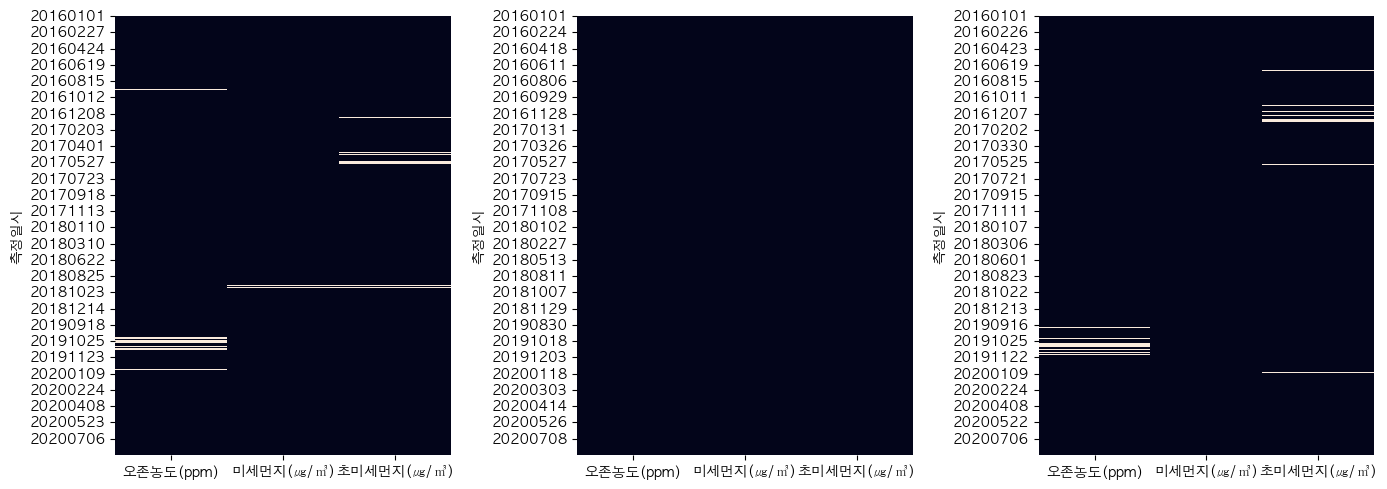

In [56]:
# [3-33] temp1, temp2, temp3의 '오존농도(ppm)':'초미세먼지(㎍/㎥)'에 대한 결측치 heatmap을 그려봅니다.
# temp1, temp3는 부분적으로 결측치가 남아있고, temp2는 결측치가 없습니다.
# plt.figure(figsize=(7, 8))
# sns.heatmap(temp3.loc[:, '오존농도(ppm)':'초미세먼지(㎍/㎥)'].isna(), cbar=False)
# plt.show()
temp_list = [temp1, temp2, temp3]

plt.figure(figsize=(14,5))

for i in range(3):
    plt.subplot(1,3,i+1)
    temp = temp_list[i].set_index('측정일시').sort_index()
    ax = sns.heatmap(temp.loc[:, '오존농도(ppm)':'초미세먼지(㎍/㎥)'].isna(), cbar=False)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

df.groupby(by=[컬럼1, 컬럼2, ...]).함수()
- 그룹 기준으로 목록을 지정하면 MultiIndex로 만들어짐
- MultiIndex인 경우의 indexing은 tuple을 사용함
- ['년', '월']을 그룹 기준으로 사용한 경우 (2017, 6) 처럼 지정함

In [57]:
# [3-34] df_dust에서 '년', '월'별 '미세먼지(㎍/㎥)' 데이터의 평균을 구해
# DataFrame으로 만들어 meandf 라는 이름을 지정합니다.ㅣ
meandf = df_dust.groupby(['년', '월'])[['미세먼지(㎍/㎥)']].mean()
meandf.head()

미세먼지(㎍/㎥)
년    월           
2016 1  52.693844
     2  48.283273
     3  66.799503
     4  73.327039
     5  58.624172

In [58]:
# [3-35] meandf에서 2017년 6월까지의 데이터만 출력합니다.
meandf.loc[:(2017,6), :]

미세먼지(㎍/㎥)
년    월            
2016 1   52.693844
     2   48.283273
     3   66.799503
     4   73.327039
     5   58.624172
     6   47.872304
     7   35.531092
     8   37.124378
     9   40.013841
     10  40.191363
     11  54.729965
     12  50.693522
2017 1   55.719138
     2   49.554029
     3   64.532392
     4   59.582549
     5   66.029826
     6   43.878112

In [59]:
# [3-36] meandf에 '결측치제거후' 및 '차이'라는 컬럼을 추가합니다.
# '결측치제거후' 컬럼은 temp2에서 '년', '월'별 '미세먼지(㎍/㎥)' 데이터의 평균을 사용합니다.
# '차이' 컬럼은 '미세먼지(㎍/㎥)' - '결측치제거후' 를 사용합니다.
meandf['결측치제거후'] = temp2.groupby(['년','월'])['미세먼지(㎍/㎥)'].mean()
meandf['차이'] = meandf['미세먼지(㎍/㎥)'] - meandf['결측치제거후']
meandf.head()

미세먼지(㎍/㎥)     결측치제거후        차이
년    월                                
2016 1  52.693844  52.693844  0.000000
     2  48.283273  48.283273  0.000000
     3  66.799503  66.799503  0.000000
     4  73.327039  73.327039  0.000000
     5  58.624172  58.571784  0.052388

In [60]:
# [3-37] meandf에서 2017년 6월까지의 데이터만 출력합니다.
# 여러 개의 값에 차이가 있는 것을 확인 할 수 있습니다.
meandf.loc[:(2017,6), :]

미세먼지(㎍/㎥)     결측치제거후        차이
년    월                                 
2016 1   52.693844  52.693844  0.000000
     2   48.283273  48.283273  0.000000
     3   66.799503  66.799503  0.000000
     4   73.327039  73.327039  0.000000
     5   58.624172  58.571784  0.052388
     6   47.872304  47.872304  0.000000
     7   35.531092  35.417235  0.113857
     8   37.124378  37.147870 -0.023492
     9   40.013841  40.051304 -0.037464
     10  40.191363  40.128497  0.062867
     11  54.729965  53.557128  1.172837
     12  50.693522  50.028426  0.665095
2017 1   55.719138  55.638219  0.080919
     2   49.554029  49.554029  0.000000
     3   64.532392  64.580699 -0.048307
     4   59.582549  57.955078  1.627471
     5   66.029826  64.139216  1.890610
     6   43.878112  43.922865 -0.044753

- temp2의 경우 NaN 데이터를 포함한 행 삭제시 평균 값이 달라진 것을 확인 할 수 있습니다.
- 삭제된 행 중, 미세먼지에 대한 값을 가진 것이 있기 때문입니다.
- "결측치 제거시에는 주의가 필요합니다."

### 3-5.결측치 대체 (평균값)

Series.mask(조건, 조건이 참일 때 사용할 값 또는 값 목록)
- 조건이 True인 것에 대해 다른 값을 변경합니다.
- s.isna() : NA값에 대해 True, NA아닌 것은 False

Series.where(조건, 조건이 거짓일 때 사용할 값 또는 값 목록)
- 조건이 False인 것에 대해서 다른 값으로 변경합니다.
- s.notna() : NA값에 대해 False, NA아닌 것은 True

In [61]:
# [3-38] where 연습을 위한 temp 생성
import numpy as np
temp = pd.DataFrame({'A':[np.nan, 2, np.nan, 4],
                     'B':[7, 8, 9, 10],
                     'C':[1, 2, 4, 8]})
temp

,A,B,C
0,NaN,7,1
1,2.0,8,2
2,NaN,9,4
3,4.0,10,8


In [62]:
# temp의 'A' 열에 대해서 결측치인 경우 'B'의 값으로 대체합니다.
s = temp['A']
s.mask(s.isna(), temp['B'])

0    7.0
1    2.0
2    9.0
3    4.0
Name: A, dtype: float64

In [63]:
s.fillna(temp['B'])

0    7.0
1    2.0
2    9.0
3    4.0
Name: A, dtype: float64

In [64]:
# temp의 'A' 열에 대해서 결측치인 경우 'C'의 값으로 대체합니다.
s.where(s.notna(), temp['C'])

0    1.0
1    2.0
2    4.0
3    4.0
Name: A, dtype: float64

In [65]:
s.fillna(temp['C'])

0    1.0
1    2.0
2    4.0
3    4.0
Name: A, dtype: float64

df.groupby(그룹기준컬럼)[함수를 적용할 컬럼명].transform(함수)
- index가 유지 되면서 그룹별 함수를 적용함
- agg는 index가 그룹기준컬럼으로 변경됨

In [66]:
df_dust.head()

,index,측정일시,측정소명,년,월,일,오존농도(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,0,20160101,강남구,2016,1,1,0.006,73.0,44.0
1,1,20160101,성북구,2016,1,1,0.005,71.0,45.0
2,2,20160101,송파구,2016,1,1,0.004,64.0,39.0
3,3,20160101,신촌로,2016,1,1,0.004,87.0,40.0
4,4,20160101,양천구,2016,1,1,0.008,82.0,65.0


In [67]:
# [앗! 살펴 보세요 ^^]
df_dust.groupby(['측정일시'])['미세먼지(㎍/㎥)'].mean()  # <- 동일한 값을 갖음.  MultiIndex 아님

측정일시
20160101    70.736842
20160102    53.789474
20160103    98.861111
20160104    76.205128
20160105    34.333333
              ...    
20200814    31.660000
20200815    37.400000
20200816    22.380000
20200817    24.980000
20200818    27.080000
Name: 미세먼지(㎍/㎥), Length: 1403, dtype: float64

In [68]:
# [3-39] df_dust의 일자(년, 월, 일)별 '미세먼지(㎍/㎥)'의 평균을 구합니다.
# 이때, index 변경을 하지 않기 위해 transform을 사용하고, fine_dust라는 이름을 지정합니다.
fine_dust = df_dust.groupby(['년', '월', '일'])['미세먼지(㎍/㎥)'].transform('mean')
fine_dust.head()

0    70.736842
1    70.736842
2    70.736842
3    70.736842
4    70.736842
Name: 미세먼지(㎍/㎥), dtype: float64

In [69]:
# [3-40] df_dust['미세먼지(㎍/㎥)'], fine_dust의 결측치 값의 개수를 구합니다.
df_dust['미세먼지(㎍/㎥)'].isna().sum(), fine_dust.isna().sum()

(881, 0)

In [70]:
# [3-41] df_dust의 '미세먼지(㎍/㎥)'의 결측치를 fine_dust의 값으로 채우기 합니다.
# 채우기 한 결과를 다시 df_dust['미세먼지(㎍/㎥)']로 저장합니다.
df_dust['미세먼지(㎍/㎥)'] = df_dust['미세먼지(㎍/㎥)'].mask(df_dust['미세먼지(㎍/㎥)'].isna(), fine_dust)

In [71]:
# [3-42] df_dust의 컬럼별 결측치 개수를 확인하여 봅니다.
# 미세먼지에 대한 결측치가 제거 되었습니다.
df_dust['미세먼지(㎍/㎥)'].isna().sum(), fine_dust.isna().sum()

(0, 0)

In [72]:
df_dust.head()

,index,측정일시,측정소명,년,월,일,오존농도(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,0,20160101,강남구,2016,1,1,0.006,73.0,44.0
1,1,20160101,성북구,2016,1,1,0.005,71.0,45.0
2,2,20160101,송파구,2016,1,1,0.004,64.0,39.0
3,3,20160101,신촌로,2016,1,1,0.004,87.0,40.0
4,4,20160101,양천구,2016,1,1,0.008,82.0,65.0


In [73]:
meandf.head()

미세먼지(㎍/㎥)     결측치제거후        차이
년    월                                
2016 1  52.693844  52.693844  0.000000
     2  48.283273  48.283273  0.000000
     3  66.799503  66.799503  0.000000
     4  73.327039  73.327039  0.000000
     5  58.624172  58.571784  0.052388

In [74]:
# [3-43] meandf에 '결측치대체' 및 '차이2'라는 컬럼을 추가합니다.
# '결측치대체' 컬럼은 df_dust에서 '년', '월'별 '미세먼지(㎍/㎥)' 데이터의 평균을 사용합니다.
# '차이2' 컬럼은 '미세먼지(㎍/㎥)' - '결측치대체'를 사용합니다.
meandf['결측치대체'] = df_dust.groupby(['년', '월'])['미세먼지(㎍/㎥)'].mean()
meandf['차이2'] = meandf['미세먼지(㎍/㎥)'] - meandf['결측치대체']
meandf.head()

미세먼지(㎍/㎥)     결측치제거후        차이      결측치대체       차이2
년    월                                                     
2016 1  52.693844  52.693844  0.000000  52.752104 -0.058261
     2  48.283273  48.283273  0.000000  48.293733 -0.010460
     3  66.799503  66.799503  0.000000  66.850594 -0.051091
     4  73.327039  73.327039  0.000000  73.478543 -0.151504
     5  58.624172  58.571784  0.052388  58.610857  0.013315

In [75]:
# [3-44] meandf에서 2017년 6월까지의 데이터만 출력합니다.
# 차이가 없는 것을 확인합니다.
meandf.loc[:(2017,6), :]

미세먼지(㎍/㎥)     결측치제거후        차이      결측치대체       차이2
년    월                                                      
2016 1   52.693844  52.693844  0.000000  52.752104 -0.058261
     2   48.283273  48.283273  0.000000  48.293733 -0.010460
     3   66.799503  66.799503  0.000000  66.850594 -0.051091
     4   73.327039  73.327039  0.000000  73.478543 -0.151504
     5   58.624172  58.571784  0.052388  58.610857  0.013315
     6   47.872304  47.872304  0.000000  47.777946  0.094358
     7   35.531092  35.417235  0.113857  35.423542  0.107550
     8   37.124378  37.147870 -0.023492  37.107287  0.017091
     9   40.013841  40.051304 -0.037464  40.036313 -0.022472
     10  40.191363  40.128497  0.062867  40.244174 -0.052811
     11  54.729965  53.557128  1.172837  54.780218 -0.050252
     12  50.693522  50.028426  0.665095  50.714662 -0.021140
2017 1   55.719138  55.638219  0.080919  55.730312 -0.011174
     2   49.554029  49.554029  0.000000  49.554029  0.000000
     3   64.532392  64.580699 -0.048307  64.535588 -0.003196
     4   59.582549  57.955078  1.627471  59.576136  0.006413
     5   66.029826  64.139216  1.890610  66.012864  0.016962
     6   43.878112  43.922865 -0.044753  43.886280 -0.008168

In [76]:
meandf['차이'].abs().sum(), meandf['차이2'].abs().sum()

(7.062269281823493, 2.76528301020522)

In [77]:
# [3-45] df_dust의 '오존농도(ppm)', '초미세먼지(㎍/㎥)' 컬럼에 대해서도
# '미세먼지(㎍/㎥)'와 같이 동일한 '년', '월', '일'의 평균 값으로 채우기 합니다.
# temp = df_dust.groupby(['년', '월', '일'])[['오존농도(ppm)','초미세먼지(㎍/㎥)']].transform('mean')
# df_dust['오존농도(ppm)'] = df_dust['오존농도(ppm)'].mask(df_dust['오존농도(ppm)'].isna(), temp['오존농도(ppm)'])
# df_dust['초미세먼지(㎍/㎥)'] = df_dust['초미세먼지(㎍/㎥)'].mask(df_dust['초미세먼지(㎍/㎥)'].isna(), temp['초미세먼지(㎍/㎥)'])

for c in ['오존농도(ppm)', '초미세먼지(㎍/㎥)']:
    c_mean = df_dust.groupby('측정일시')[c].transform('mean')
    df_dust[c] = df_dust[c].mask(df_dust[c].isna(), c_mean)

In [78]:
# [3-46] df_dust의 컬럼별 결측치 개수를 확인합니다.
df_dust.isna().sum()

index         0
측정일시          0
측정소명          0
년             0
월             0
일             0
오존농도(ppm)     0
미세먼지(㎍/㎥)     0
초미세먼지(㎍/㎥)    0
dtype: int64

In [79]:
# 필요시 저장하였다가 가져와 사용하면 됩니다 ^^!
df_dust.to_csv('./data_01/fine_dust02.csv', index=False)

In [80]:
df_dust2 = pd.read_csv('./data_01/fine_dust02.csv')
df_dust2.isna().sum()

index         0
측정일시          0
측정소명          0
년             0
월             0
일             0
오존농도(ppm)     0
미세먼지(㎍/㎥)     0
초미세먼지(㎍/㎥)    0
dtype: int64

In [81]:
import shelve
with shelve.open('mydata') as data:
    data['fine_dust02'] = df_dust

In [82]:
import shelve
with shelve.open('mydata') as data:
    df_dust3 = data['fine_dust02']

In [83]:
import shelve

with shelve.open('./data_01/my_data') as data:
    data['df_dust'] = df_dust

In [84]:
with shelve.open('./data_01/my_data') as data:
    df_dust3 = data['df_dust']

df_dust3.isna().sum().sum()

0

### 3-6. 미세먼지 분석

In [85]:
# 데이터 값 실수. 소수점 넷째자리까지 표시
pd.options.display.float_format = '{:.2f}'.format

In [86]:
# [3-47] df_dust의 첫 2개 행을 출력합니다.
df_dust.head(2)

,index,측정일시,측정소명,년,월,일,오존농도(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,0,20160101,강남구,2016,1,1,0.01,73.00,44.00
1,1,20160101,성북구,2016,1,1,0.01,71.00,45.00


행, 열에 모두 group을 지정하여 통계값 구하기
- DataFrame.pivot_table(index=행방향그룹열이름, columns=열방향그룹열이름, values=집계대상열이름, aggfunc=구할 통계값)
- 각각에 대해 단독 또는 목록을 사용할 수 있음
- index, columns는 범주형, values는 연속형 사용
- values, aggfunc의 경우 단독의 경우 출력에 표시되지 않으나, 목록은 표시됨

In [87]:
# [3-48] df_dust의 월/년 별 미세먼지의 'mean', 'min', 'max' 구하기
# pivot_table 사용, values의 경우 목록으로 지정시와 단독 지정시가 다르게 표시됨
df_dust.pivot_table(index='월', columns='년', values='미세먼지(㎍/㎥)', aggfunc=['mean', 'min', 'max'])
# df_dust.pivot_table(index='월', columns='년', values=['미세먼지(㎍/㎥)'], aggfunc=['mean', 'min', 'max'])

mean                           min                            max         \
년   2016  2017  2018  2019  2020  2016  2017  2018  2019  2020   2016   2017   
월                                                                              
1  52.75 55.73 53.88   NaN 43.18 22.00 14.00 15.00   NaN  3.00 127.00 151.00   
2  48.29 49.55 56.07   NaN 41.95  9.00 23.00 22.00   NaN  7.00 124.00 135.00   
3  66.85 64.54 43.90   NaN 46.35 18.00 19.00  6.00   NaN 18.00 166.00 149.00   
4  73.48 59.58 51.98   NaN 45.61 21.00 14.00  5.00   NaN 11.00 270.00 134.00   
5  58.61 66.01 40.38   NaN 36.47 14.00 15.00  4.00   NaN  5.00 153.00 243.00   
6  47.78 43.89 50.02   NaN 38.04 15.00 11.00 30.00   NaN  4.00 122.00  85.00   
7  35.42 36.67 26.13   NaN 22.13  3.00  8.00  3.00   NaN  3.00  85.00  85.00   
8  37.11 24.57 23.98 27.68 22.32  4.00  5.00  4.00 11.00  3.00 122.00  76.00   
9  40.04 36.62 21.63 22.09   NaN  7.00  6.00  4.00  3.00   NaN 104.00  94.00   
10 40.24 32.49 29.94 30.86   NaN  5.00  5.00  3.00  3.00   NaN 117.00  97.00   
11 54.78 45.32 53.70 40.72   NaN 12.00 12.00  4.00  3.00   NaN 139.00 108.00   
12 50.71 53.38 43.64 42.16   NaN 19.00 14.00 14.00 13.00   NaN 117.00 165.00   

                         
년    2018   2019   2020  
월                        
1  154.00    NaN  90.00  
2  127.00    NaN 103.00  
3  141.00    NaN 142.00  
4  117.00    NaN 126.00  
5  105.00    NaN 167.00  
6   85.00    NaN  79.00  
7   73.00    NaN 167.00  
8   59.00 130.00  58.00  
9   83.00  77.00    NaN  
10  90.00 179.00    NaN  
11 199.00 297.00    NaN  
12 114.00 142.00    NaN

In [88]:
# [3-49] df_dust에서 '측정소명'이 '강남구'인 데이터의
# 월별(index), 년별(columns), 미세먼지 농도 평균을 조회하여 temp로 저장합니다
temp = df_dust.loc[df_dust['측정소명'] == '강남구', :].pivot_table(index='월', columns='년', values='미세먼지(㎍/㎥)', aggfunc='mean')
temp 
# df_dust.loc[df_dust['측정소명'] == '강남구', :].pivot_table(index='월', columns='년', values=['미세먼지(㎍/㎥)'], aggfunc=['mean'])

년,2016,2017,2018,2019,2020
월,,,,,
1,52.68,57.61,42.55,NaN,39.00
2,48.48,52.36,50.04,NaN,38.48
3,65.65,64.82,37.10,NaN,40.77
4,78.03,58.10,44.38,NaN,38.40
5,56.50,62.16,33.00,NaN,30.81
6,46.50,43.57,42.29,NaN,33.93
7,35.87,34.19,21.59,NaN,19.90
8,37.58,22.61,18.74,29.24,22.83
9,42.63,32.73,16.17,21.72,NaN


- Series.argmax() : 가장 값이 큰 것의 integer index 구하기
- Series.argmin() : 가장 값이 작은 것의 integer index 구하기
- Series[Series.argmax()] : 가장 큰 값 구하기
- Series[Series.argmin()] : 가장 작은 값 구하기

In [89]:
# argmin, argmax를 연습하기 위한 Series
s = pd.Series([1, 0, 5, 7, 9, 2, 6, 8],
              index=list('ABCDEFGH'))
s

A    1
B    0
C    5
D    7
E    9
F    2
G    6
H    8
dtype: int64

In [90]:
# argmin(), argmax() 구하기
a = s.argmin()
b = s.argmax()
print(a, s[a])
print(b, s[b])

1 0
4 9


In [91]:
# [3-50] 2016년 ~ 2020년도 미세먼지 농도가 가장 높은 월의 위치
df_dust_month = df_dust.pivot_table(index='월', columns='년', values='미세먼지(㎍/㎥)', aggfunc='mean')

for y in df_dust_month.columns:
    s = df_dust_month[y]
    print(f'{y} 년 - {s.index[s.argmax()]:2d} 월')

2016 년 -  4 월
2017 년 -  5 월
2018 년 -  2 월
2019 년 - 12 월
2020 년 -  3 월


In [92]:
# 2019년 데이터 중 1~7월이 없기 때문에 12월이 나옴

In [93]:
# [3-51] 2016년 ~ 2020년도 미세먼지 농도가 가장 낮은 월의 위치

for y in df_dust_month.columns:
    s = df_dust_month[y]
    print(f'{y}년 - {s.index[s.argmin()]:2d}월')

2016년 -  7월
2017년 -  8월
2018년 -  9월
2019년 -  9월
2020년 -  7월


In [94]:
# 2020년 데이터 중 9-12월이 없기 때문에 7월이 나옴

In [95]:
df_dust.head(2)

,index,측정일시,측정소명,년,월,일,오존농도(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,0,20160101,강남구,2016,1,1,0.01,73.00,44.00
1,1,20160101,성북구,2016,1,1,0.01,71.00,45.00


In [96]:
df_dust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60208 entries, 0 to 60207
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       60208 non-null  int64  
 1   측정일시        60208 non-null  int64  
 2   측정소명        60208 non-null  object 
 3   년           60208 non-null  int64  
 4   월           60208 non-null  int64  
 5   일           60208 non-null  int64  
 6   오존농도(ppm)   60208 non-null  float64
 7   미세먼지(㎍/㎥)   60208 non-null  float64
 8   초미세먼지(㎍/㎥)  60208 non-null  float64
dtypes: float64(3), int64(5), object(1)
memory usage: 4.1+ MB


In [97]:
# [3-52] 2016년 ~ 2019년 월별 미세먼지 평균을 구해 temp (DataFrame)로 저장합니다.
temp = df_dust.loc[df_dust['년'].isin(range(2016,2020)), ['년', '월', '미세먼지(㎍/㎥)']].pivot_table(index='월', values='미세먼지(㎍/㎥)')
temp.head()

,미세먼지(㎍/㎥)
월,
1,54.12
2,51.22
3,60.38
4,62.76
5,56.76


In [98]:
temp.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='월')

In [99]:
# [3-53] 2020년 월별 미세먼지 평균을 구해 temp에 '미세먼지 2020' 컬럼으로 추가합니다.
temp['미세먼지 2020'] = df_dust.loc[df_dust['년']==2020, ['월', '미세먼지(㎍/㎥)']].groupby('월')['미세먼지(㎍/㎥)'].mean()
temp

,미세먼지(㎍/㎥),미세먼지 2020
월,,
1,54.12,43.18
2,51.22,41.95
3,60.38,46.35
4,62.76,45.61
5,56.76,36.47
6,46.27,38.04
7,32.88,22.13
8,28.41,22.32
9,29.75,NaN


In [100]:
# [3-54] temp에 '차이'라는 이름의 컬럼을 추가합니다.
# '차이' = '미세먼지(㎍/㎥)' - '미세먼지 2020'
temp['차이'] = temp['미세먼지(㎍/㎥)'] - temp['미세먼지 2020']
temp

,미세먼지(㎍/㎥),미세먼지 2020,차이
월,,,
1,54.12,43.18,10.94
2,51.22,41.95,9.27
3,60.38,46.35,14.03
4,62.76,45.61,17.15
5,56.76,36.47,20.29
6,46.27,38.04,8.23
7,32.88,22.13,10.75
8,28.41,22.32,6.09
9,29.75,NaN,NaN


### 3-7. 그래프로 확인하기

In [101]:
## 그래프만 하시는 분들은  
# 1. 파일다운로드
# 2. Colab에서 한글 폰트 사용하기 실행 후 진행하세요 

In [102]:
# 데이터 작성 - 그래프만 작성해볼때 사용하시면 됩니다.
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 값 실수. 소수점 둘째자리까지 표시
pd.options.display.float_format = '{:.2f}'.format

dfList = []
for x in sorted(glob.glob('data_01/data_day_*.xlsx')):
    temp = pd.read_excel(x)
    dfList.append(temp)

df = pd.concat(dfList, axis=0, ignore_index=True)   
#df.shape
df.insert(1, '측정일시2', pd.to_datetime(df['측정일시'], format='%Y%m%d'))
df['년'] = df['측정일시2'].dt.year
df['월'] = df['측정일시2'].dt.month
df['일'] = df['측정일시2'].dt.day
df2 = df.drop(columns=['측정일시2'])
df1 = df.set_index('측정일시').sort_index()
df_dust = df1[['측정소명', '년', '월', '일','오존농도(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']]
df_dust = df_dust.reset_index()
fine_dust = df_dust.groupby('측정일시')['미세먼지(㎍/㎥)'].transform('mean')
s = df_dust['미세먼지(㎍/㎥)']
df_dust['미세먼지(㎍/㎥)'] = s.mask(s.isna(), fine_dust)
x = df_dust.groupby('측정일시')[['오존농도(ppm)', '초미세먼지(㎍/㎥)']].transform('mean')
y = df_dust[['오존농도(ppm)', '초미세먼지(㎍/㎥)']]
df_dust[['오존농도(ppm)', '초미세먼지(㎍/㎥)']] = y.mask(y.isna(), x)

In [105]:
df_dust.head()

,측정일시,측정소명,년,월,일,오존농도(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20160101,강남구,2016,1,1,0.01,73.00,44.00
1,20160101,성북구,2016,1,1,0.01,71.00,45.00
2,20160101,송파구,2016,1,1,0.00,64.00,39.00
3,20160101,신촌로,2016,1,1,0.00,87.00,40.00
4,20160101,양천구,2016,1,1,0.01,82.00,65.00


In [109]:
# [3-55] 월별(index), 년별(columns), 미세먼지 농도 평균을 조회하여 data로 저장합니다
data = df_dust.pivot_table(index='월', columns='년', values='미세먼지(㎍/㎥)')
data

년,2016,2017,2018,2019,2020
월,,,,,
1,52.75,55.73,53.88,NaN,43.18
2,48.29,49.55,56.07,NaN,41.95
3,66.85,64.54,43.90,NaN,46.35
4,73.48,59.58,51.98,NaN,45.61
5,58.61,66.01,40.38,NaN,36.47
6,47.78,43.89,50.02,NaN,38.04
7,35.42,36.67,26.13,NaN,22.13
8,37.11,24.57,23.98,27.68,22.32
9,40.04,36.62,21.63,22.09,NaN


In [113]:
# [3-56] 2016년도 미세먼지 농도가 가장 높은 월은?
year = 2016
data.index[data.loc[:, year].argmax()]

4

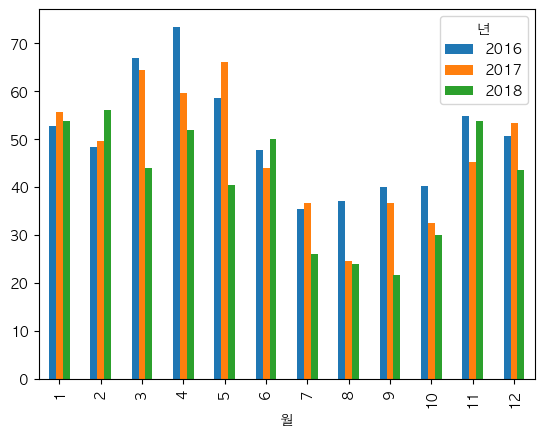

In [120]:
# [3-57] 2016 ~ 2018 년도별 월별 미세먼지 농도 추이 그래프
data.loc[:, 2016:2018].plot(kind='bar')
plt.show()

In [126]:
# [3-58] 2016~2018년까지의 월별 미세먼지 평균 구하기
s = data.loc[:, 2016:2018].mean(axis=1)
s

월
1    54.12
2    51.31
3    58.43
4    61.68
5    55.00
6    47.23
7    32.74
8    28.55
9    32.76
10   34.23
11   51.27
12   49.24
dtype: float64

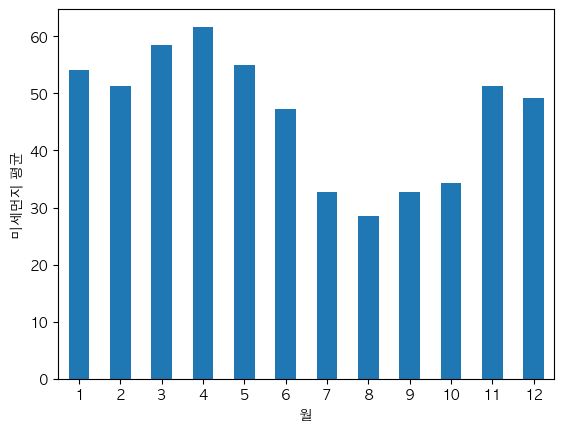

In [132]:
# [3-59] 3년 평균 미세먼지 농도가 가장 높은 월과 낮은 월 강조 그래프
s.plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('미세먼지 평균')
plt.show()

In [135]:
# [3-60] 2016~2018 미세먼지 농도 측정치 중 가장 큰 값은?
data.loc[:, 2016:2018].max()

년
2016   73.48
2017   66.01
2018   56.07
dtype: float64

In [139]:
# [3-61] 2016~2018 미세먼지 농도 측정치 중 가장 큰 값을 갖는 정보
df_dust.groupby('년')['미세먼지(㎍/㎥)'].max()

년
2016   270.00
2017   243.00
2018   199.00
2019   297.00
2020   167.00
Name: 미세먼지(㎍/㎥), dtype: float64

In [149]:
# [3-62] 측정소 중에서 평균 미세먼지 농도가 가장 낮은 곳은 어디일까?
s = df_dust.groupby('측정소명')['미세먼지(㎍/㎥)'].mean()
s.index[s.argmin()]

'도로변1(광화문역)'

In [150]:
# [3-63] 측정소 중에서 평균 미세먼지 농도가 가장 높은 곳은 어디일까?
s.index[s.argmax()]

'공사장2(신문로)'

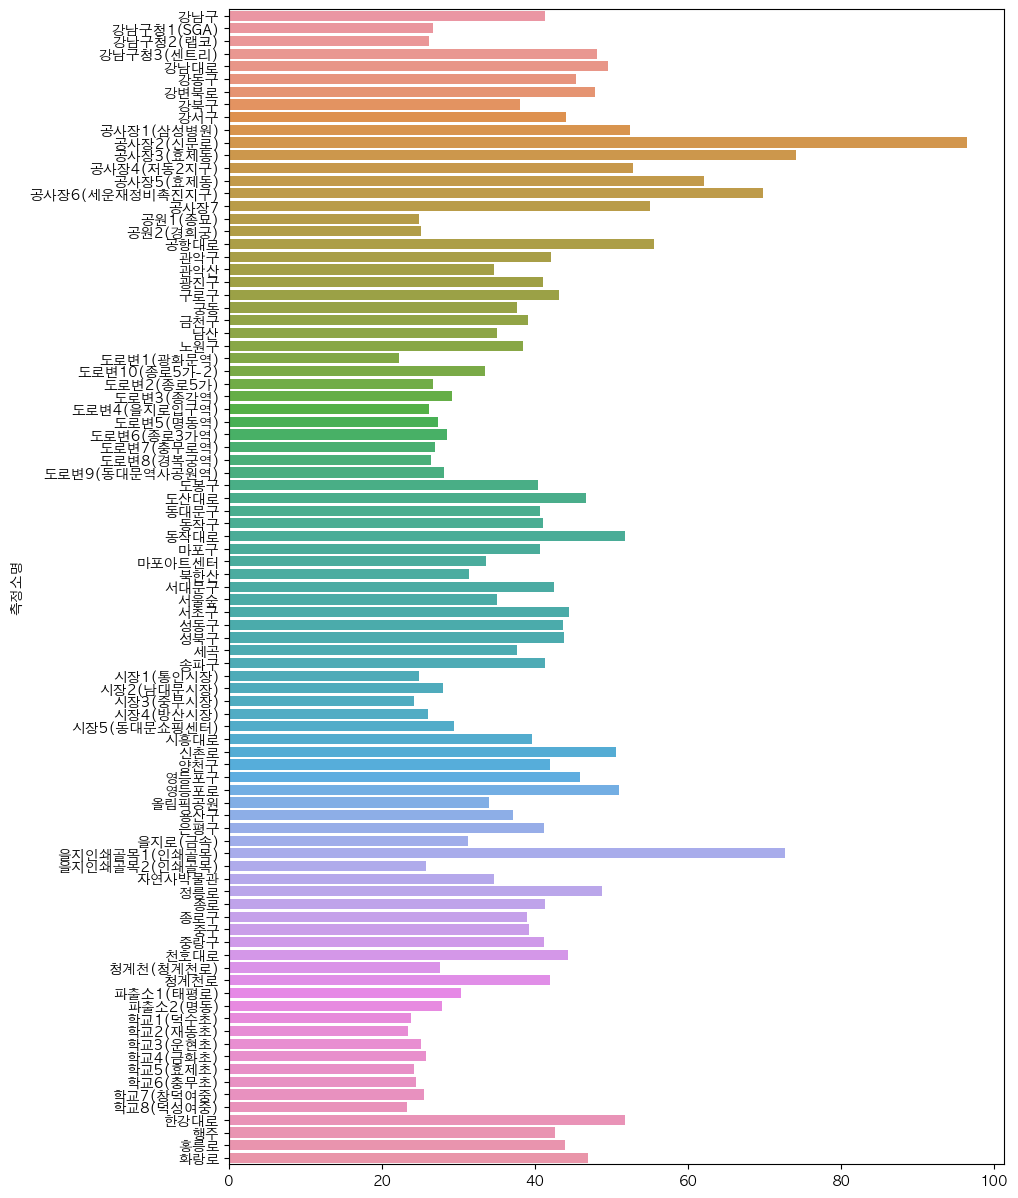

In [176]:
# [3-64] 측정소별 미세먼지 농도 평균을 그래프로 살펴보자
plt.figure(figsize=(10,15))
sns.barplot(x=s.values, y=s.index, data)
plt.show()